In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns

In [ ]:
file_path = "/content/base_agricola_2019_2023.xlsx"
df = pd.read_excel(file_path)
df_grupos = df.groupby('Departamento')

In [ ]:
#Análisis exploratorio: Verificación de la limpieza de los datos#

print("Tipo de datos y valores faltantes")
print(df.info())
print()

print("Estadísticas descriptivas de las columnas numéricas")
print(df.describe())
print()

print("Conteo de valores faltantes")
print(df.isnull().sum())
print()

print("Conteo de valores duplicados")
print(df.duplicated().sum())


Tipo de datos y valores faltantes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115572 entries, 0 to 115571
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Departamento           115572 non-null  object 
 1   Municipio              115572 non-null  object 
 2   Desagregacion_cultivo  115572 non-null  object 
 3   Cultivo                115572 non-null  object 
 4   Ciclo_Cultivo          115572 non-null  object 
 5   Grupo_Cultivo          115572 non-null  object 
 6   Subgrupo               115572 non-null  object 
 7   Año                    115572 non-null  int64  
 8   Área_sembrada_(ha)     115572 non-null  float64
 9   Área_cosechada_(ha)    115572 non-null  float64
 10  Producción_(t)         115572 non-null  float64
 11  Rendimiento_(t/ha)     115572 non-null  float64
 12  Nombre_científico      115572 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 11.5+ 

#Risaralda

In [ ]:
#Separación de los datos pertenecientes al cultivo de café en Risaralda#
risaralda = df_grupos.get_group("Risaralda")
risaralda_cult = risaralda.groupby("Desagregacion_cultivo")
rda_cafe = risaralda_cult.get_group("Café")

#Confirmación de datos duplicados en este subgrupo del dataset#
print(rda_cafe.duplicated().sum())


0


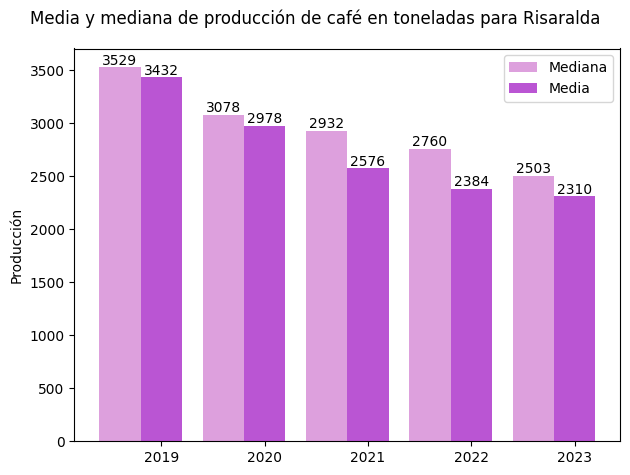

In [ ]:
rda_cafe_mean = rda_cafe.groupby("Año")["Producción_(t)"].mean()
rda_cafe_median = rda_cafe.groupby("Año")["Producción_(t)"].median()

fig_r = plt.figure()
ax_r = fig_r.add_subplot(111)
width = 0.4
rects1 = ax_r.bar(rda_cafe_mean.index, rda_cafe_median.values, width, color = "plum")
rects2 = ax_r.bar(rda_cafe_mean.index+width, rda_cafe_mean.values, width, color = "mediumorchid")

ax_r.set_ylabel('Producción')
ax_r.set_xticks(rda_cafe_mean.index+width)
ax_r.set_xticklabels( ("2019", "2020", "2021", "2022", "2023") )
ax_r.legend( (rects1[0], rects2[0]), ('Mediana', 'Media') )
fig_r.suptitle('Media y mediana de producción de café en toneladas para Risaralda')


def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax_r.text(rect.get_x()+rect.get_width()/2., 1.0*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.tight_layout()

Text(0.5, 1.0, 'Producción en toneladas de café por municipio y año en Risaralda')

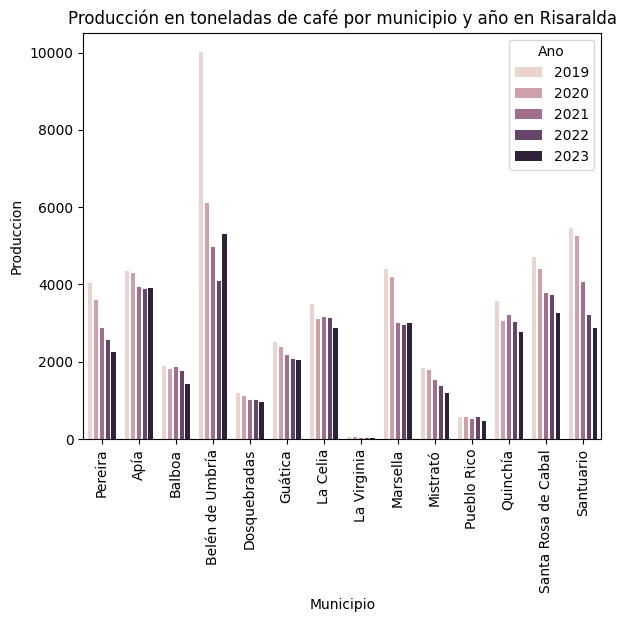

In [ ]:
#Gráfico de barras de producción anual por municipio #
rda_cafe_melt_p = rda_cafe.melt(id_vars = "Municipio",
          value_vars = ["Producción_(t)"],
          var_name = "Producción", value_name = "Produccion")

rda_cafe_melt_f = rda_cafe.melt(id_vars = "Municipio",
          value_vars = ["Año"],
          var_name = "Fecha", value_name = "Ano")

sns.set_palette("Greens")
sns.barplot(y= rda_cafe_melt_p["Produccion"], x= rda_cafe_melt_p["Municipio"],
            hue = rda_cafe_melt_f['Ano'], gap = 0.3, errorbar = None)

plt.tight_layout()
plt.xticks(rotation=90)
plt.title("Producción en toneladas de café por municipio y año en Risaralda")

#Quindío

In [ ]:
#Separación de los datos pertenecientes al cultivo de café en Quindío#
quindio = df_grupos.get_group("Quindío")
quindio_cult = quindio.groupby("Desagregacion_cultivo")
quindio_cafe = quindio_cult.get_group("Café")

#Confirmación de datos duplicados en este subgrupo del dataset#
print(quindio_cafe.duplicated().sum())

0


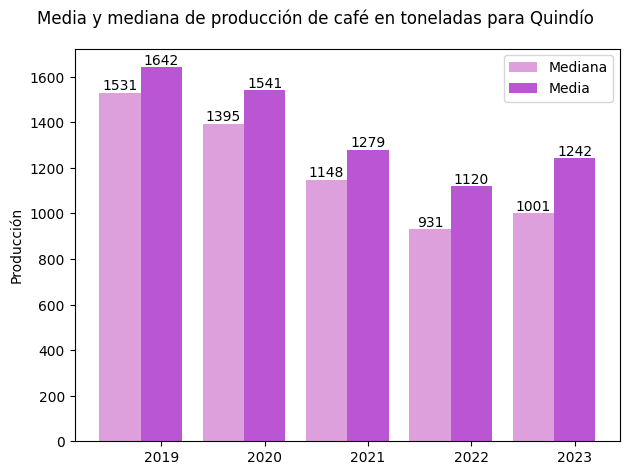

In [ ]:
quindio_cafe_mean = quindio_cafe.groupby("Año")["Producción_(t)"].mean()
quindio_cafe_median = quindio_cafe.groupby("Año")["Producción_(t)"].median()

fig_q= plt.figure()
ax_q = fig_q.add_subplot(111)
width = 0.4
rects1_q = ax_q.bar(quindio_cafe_mean.index, quindio_cafe_median.values, width, color = "plum")
rects2_q = ax_q.bar(quindio_cafe_mean.index+width, quindio_cafe_mean.values, width, color = "mediumorchid")

ax_q.set_ylabel('Producción')
ax_q.set_xticks(quindio_cafe_mean.index+width)
ax_q.set_xticklabels( ("2019", "2020", "2021", "2022", "2023") )
ax_q.legend( (rects1_q[0], rects2_q[0]), ('Mediana', 'Media') )
fig_q.suptitle('Media y mediana de producción de café en toneladas para Quindío')

def autolabel1(rects):
    for rect in rects:
        h = rect.get_height()
        ax_q.text(rect.get_x()+rect.get_width()/2., 1.0*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel1(rects1_q)
autolabel1(rects2_q)
plt.tight_layout()

Text(0.5, 1.0, 'Producción en toneladas de café por municipio y año en Quindío')

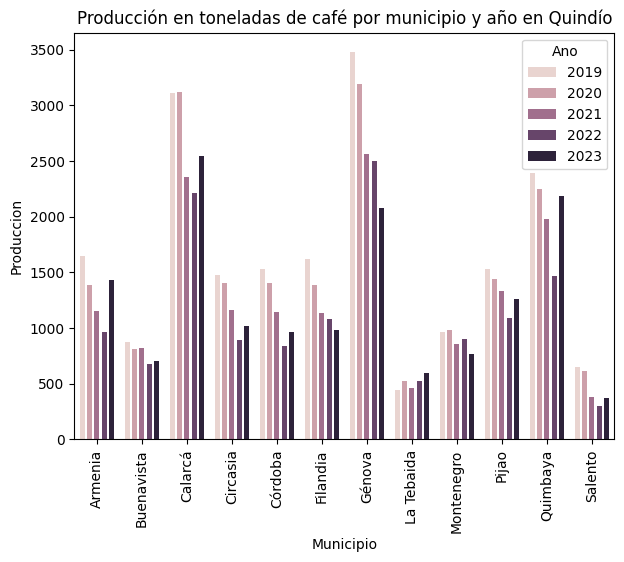

In [ ]:
qdio_cafe_melt_p = quindio_cafe.melt(id_vars = "Municipio",
          value_vars = ["Producción_(t)"],
          var_name = "Producción", value_name = "Produccion")

qdio_cafe_melt_f = quindio_cafe.melt(id_vars = "Municipio",
          value_vars = ["Año"],
          var_name = "Fecha", value_name = "Ano")

sns.barplot(y= qdio_cafe_melt_p["Produccion"], x= qdio_cafe_melt_p["Municipio"],
            hue = qdio_cafe_melt_f['Ano'], gap = 0.3, errorbar = None)
sns.set_palette("Greens")
plt.tight_layout()
plt.xticks(rotation=90)
plt.title("Producción en toneladas de café por municipio y año en Quindío")

#Caldas

In [ ]:
#Separación de los datos pertenecientes al cultivo de café en Risaralda#
caldas = df_grupos.get_group("Caldas")
caldas_cult = caldas.groupby("Desagregacion_cultivo")
caldas_cafe = caldas_cult.get_group("Café")

#Confirmación de datos duplicados en este subgrupo del dataset#
print(caldas_cafe.duplicated().sum())

0


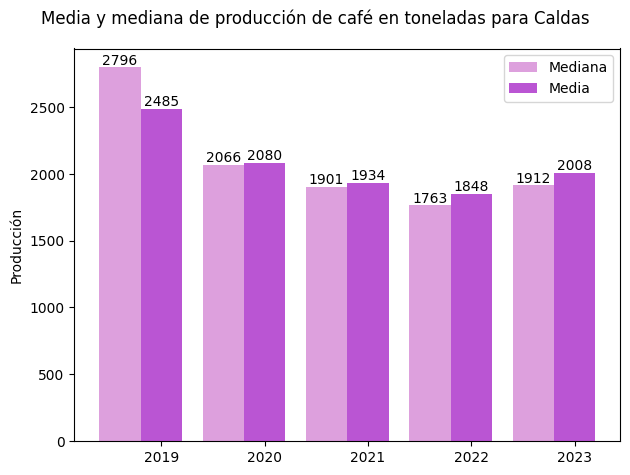

In [ ]:
caldas_cafe_mean = caldas_cafe.groupby("Año")["Producción_(t)"].mean()
caldas_cafe_median = caldas_cafe.groupby("Año")["Producción_(t)"].median()

fig_c= plt.figure()
ax_c = fig_c.add_subplot(111)
width = 0.4
rects1_c = ax_c.bar(caldas_cafe_mean.index, caldas_cafe_median.values, width, color = "plum")
rects2_c = ax_c.bar(caldas_cafe_mean.index+width, caldas_cafe_mean.values, width, color = "mediumorchid")

ax_c.set_ylabel('Producción')
ax_c.set_xticks(caldas_cafe_mean.index+width)
ax_c.set_xticklabels( ("2019", "2020", "2021", "2022", "2023") )
ax_c.legend( (rects1_c[0], rects2_c[0]), ('Mediana', 'Media') )
fig_c.suptitle('Media y mediana de producción de café en toneladas para Caldas')

def autolabel2(rects):
    for rect in rects:
        h = rect.get_height()
        ax_c.text(rect.get_x()+rect.get_width()/2., 1.0*h, '%d'%int(h),
                ha='center', va='bottom')


autolabel2(rects1_c)
autolabel2(rects2_c)
plt.tight_layout()

Text(0.5, 1.0, 'Producción en toneladas de café por municipio y año en Caldas')

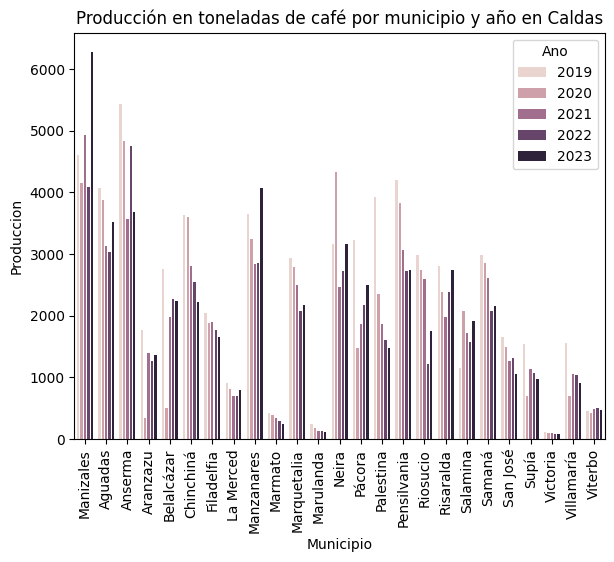

In [ ]:
caldas_cafe_melt_p = caldas_cafe.melt(id_vars = "Municipio",
          value_vars = ["Producción_(t)"],
          var_name = "Producción", value_name = "Produccion")

caldas_cafe_melt_f = caldas_cafe.melt(id_vars = "Municipio",
          value_vars = ["Año"],
          var_name = "Fecha", value_name = "Ano")

sns.set_palette("Greens")
sns.barplot(y= caldas_cafe_melt_p["Produccion"], x= caldas_cafe_melt_p["Municipio"],
            hue = caldas_cafe_melt_f['Ano'], gap = 0.3, errorbar = None)
plt.tight_layout()
plt.xticks(rotation=90)
plt.title("Producción en toneladas de café por municipio y año en Caldas")

#Gráficos indicador de aprovechamiento

##Risaralda

In [ ]:
file_path_r = "/content/Zonificaci_n_de_aptitud_para_el_cultivo_de_caf___Coffea_arabica_L.__en_Colombia._20250412(2).csv"
df1 = pd.read_csv(file_path_r, sep=';')
df1['Área (ha)'] = df1['Área (ha)'].str.replace(',', '').astype(float)
df1['Área (ha)']= df1['Área (ha)'].astype(float)
df_clean_r = df1[(df1['Aptitud']!= 'Exclusión legal') &(df1['Aptitud']!= 'No apta') ]
df_municipios_r = df_clean_r.groupby(['Municipio', 'Aptitud'])['Área (ha)'].sum()
ind1 = risaralda.groupby(['Municipio','Año'])[['Área_sembrada_(ha)', 'Área_cosechada_(ha)']].sum().reset_index()

In [ ]:
#Cálculo del indicador 1 y adición al dataframe
dataind1 = ind1['Área_cosechada_(ha)']/ ind1['Área_sembrada_(ha)']
ind1 = pd.concat([ind1, dataind1],  axis=1)
ind1 = ind1.rename(columns={0: 'Indicador1'})

#Filtrado del área máxima de la base de datos de aptitud por municipio
df_municipios_r = df_clean_r.loc[df_clean_r.groupby('Municipio')['Área (ha)'].idxmax()][['Municipio', 'Aptitud', 'Área (ha)']]
ind1 = pd.merge(ind1, df_municipios_r, on='Municipio')

#Calculo del indicador 2 y adición al dataframe
ind1['Indicador2'] = ind1['Área_cosechada_(ha)']/ind1['Área (ha)']


In [ ]:
#"Voltear" el dataframe para indicador 1
df_pivot = ind1.pivot(index='Año', columns='Municipio', values='Indicador1')

In [ ]:
#Determinar los 5 municipios con mayor producción en Risaralda
rda_cafe_melt_p.groupby("Municipio")["Produccion"].mean().nlargest(n=5)

,Produccion
Municipio,
Belén de Umbría,6097.75288
Santuario,4166.64688
Apía,4067.32424
Santa Rosa de Cabal,3974.34060
Marsella,3509.60600


Text(0.5, 0.98, 'Rendimiento relativo para los 5 municipios con mayor producción de café en Risaralda')

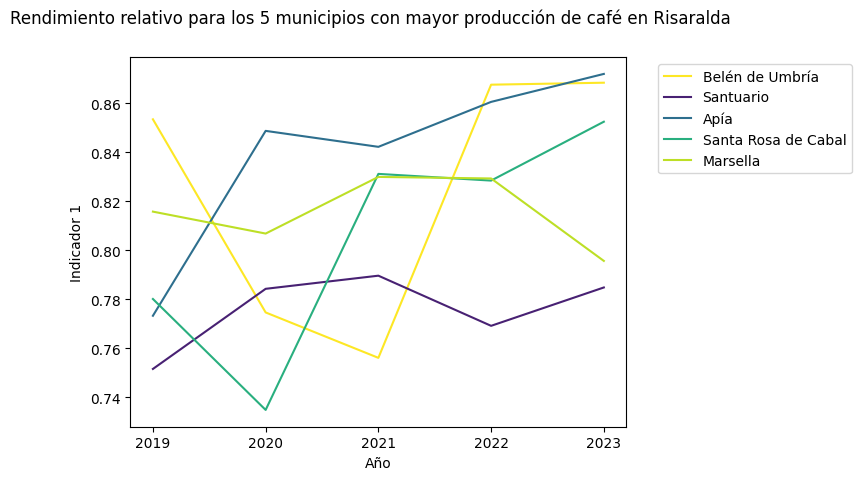

In [ ]:
#Grafico del Indicador 1
fig, ax = plt.subplots()
ax.plot(["2019","2020","2021","2022","2023"], df_pivot["Belén de Umbría"], color = "#FDE725", label = "Belén de Umbría")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot["Santuario"], color = "#482173", label = "Santuario")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot["Apía"], color = "#2e6f8e", label = "Apía")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot["Santa Rosa de Cabal"], color = "#29af7f", label = "Santa Rosa de Cabal")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot["Marsella"], color = "#bddf26", label = "Marsella")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_xlabel('Año')
ax.set_ylabel('Indicador 1')
plt.suptitle("Rendimiento relativo para los 5 municipios con mayor producción de café en Risaralda")

Text(0.5, 0.98, 'Rendimiento potencial para los 5 municipios con mayor producción de café en Risaralda')

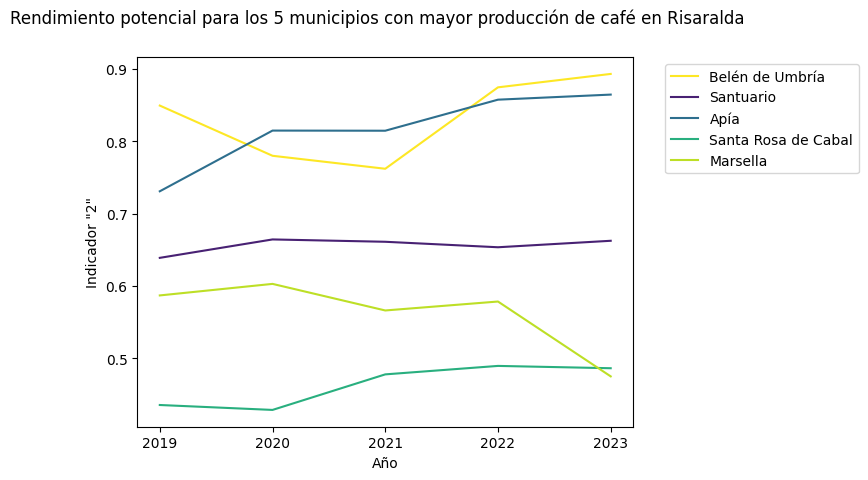

In [ ]:
#dataframe para indicador 2
df_pivot2 = ind1.pivot(index='Año', columns='Municipio', values='Indicador2')
#Grafico del Indicador 2
fig, ax = plt.subplots()
ax.plot(["2019","2020","2021","2022","2023"], df_pivot2["Belén de Umbría"], color = "#FDE725", label = "Belén de Umbría")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot2["Santuario"], color = "#482173", label = "Santuario")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot2["Apía"], color = "#2e6f8e", label = "Apía")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot2["Santa Rosa de Cabal"], color = "#29af7f", label = "Santa Rosa de Cabal")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot2["Marsella"], color = "#bddf26", label = "Marsella")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_xlabel('Año')
ax.set_ylabel('Indicador "2"')
plt.suptitle("Rendimiento potencial para los 5 municipios con mayor producción de café en Risaralda")

##Quindío

In [ ]:
file_path_q = "/content/Zonificación Parcial Quindío.csv"
df2 = pd.read_csv(file_path_q, sep=',')
df2['Área (ha)']= df2['Área (ha)'].astype(float)
df_clean_q = df2[(df2['Aptitud']!= 'Exclusión legal') &(df2['Aptitud']!= 'No apta') ]
df_municipios_q = df_clean_q.groupby(['Municipio', 'Aptitud'])['Área (ha)'].sum()
ind1_q = quindio.groupby(['Municipio','Año'])[['Área_sembrada_(ha)', 'Área_cosechada_(ha)']].sum().reset_index()


In [ ]:
#Cálculo del indicador 1 y adición al dataframe
dataind1_q = ind1_q['Área_cosechada_(ha)']/ ind1_q['Área_sembrada_(ha)']
ind1_q = pd.concat([ind1_q, dataind1_q],  axis=1)
ind1_q = ind1_q.rename(columns={0: 'Indicador1'})

#Filtrado del área máxima de la base de datos de aptitud por municipio
df_municipios_q = df_clean_q.loc[df_clean_q.groupby('Municipio')['Área (ha)'].idxmax()][['Municipio', 'Aptitud', 'Área (ha)']]
ind1_q = pd.merge(ind1_q, df_municipios_q, on='Municipio')

#Calculo del indicador 2 y adición al dataframe
ind1_q['Indicador2'] = ind1_q['Área_cosechada_(ha)']/ind1_q['Área (ha)']


In [ ]:
#"Voltear" el dataframe
df_pivot_q = ind1_q.pivot(index='Año', columns='Municipio', values='Indicador1')
df_pivot_q.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2019 to 2023
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Armenia     5 non-null      float64
 1   Buenavista  5 non-null      float64
 2   Calarcá     5 non-null      float64
 3   Circasia    5 non-null      float64
 4   Córdoba     5 non-null      float64
 5   Filandia    5 non-null      float64
 6   La Tebaida  5 non-null      float64
 7   Montenegro  5 non-null      float64
 8   Pijao       5 non-null      float64
 9   Quimbaya    5 non-null      float64
 10  Salento     5 non-null      float64
dtypes: float64(11)
memory usage: 480.0 bytes


In [ ]:
#Determinar los 5 municipios con mayor producción en Risaralda
qdio_cafe_melt_p.groupby("Municipio")["Produccion"].mean().nlargest(n=6)

,Produccion
Municipio,
Génova,2760.73800
Calarcá,2667.92000
Quimbaya,2054.66228
Pijao,1328.58058
Armenia,1315.98698
Filandia,1240.78464


Text(0.5, 0.98, 'Rendimiento relativo para los 5 municipios con mayor producción de café en Quindío')

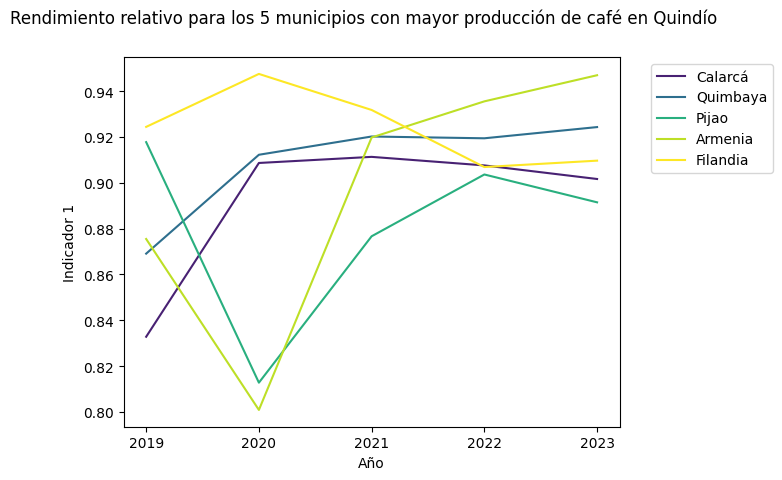

In [ ]:
#Grafico del Indicador 1
fig, ax = plt.subplots()
ax.plot(["2019","2020","2021","2022","2023"], df_pivot_q["Calarcá"], color = "#482173", label = "Calarcá")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot_q["Quimbaya"], color = "#2e6f8e", label = "Quimbaya")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot_q["Pijao"], color = "#29af7f", label = "Pijao")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot_q["Armenia"], color = "#bddf26", label = "Armenia")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot_q["Filandia"], color = "#FDE725", label = "Filandia")

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_xlabel('Año')
ax.set_ylabel('Indicador 1')
plt.suptitle("Rendimiento relativo para los 5 municipios con mayor producción de café en Quindío")

Text(0.5, 0.98, 'Rendimiento potencial para los 5 municipios con mayor producción de café en Quindío')

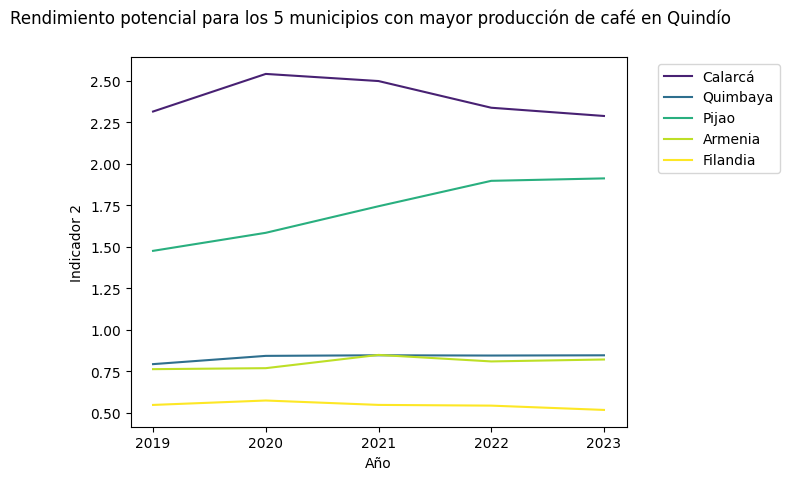

In [ ]:
#dataframe para indicador 2
df_pivot2_q = ind1_q.pivot(index='Año', columns='Municipio', values='Indicador2')
#Grafico del Indicador 2
fig, ax = plt.subplots()
ax.plot(["2019","2020","2021","2022","2023"], df_pivot2_q["Calarcá"], color = "#482173", label = "Calarcá")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot2_q["Quimbaya"], color = "#2e6f8e", label = "Quimbaya")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot2_q["Pijao"], color = "#29af7f", label = "Pijao")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot2_q["Armenia"], color = "#bddf26", label = "Armenia")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot2_q["Filandia"], color = "#FDE725", label = "Filandia")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_xlabel('Año')
ax.set_ylabel('Indicador 2')
plt.suptitle("Rendimiento potencial para los 5 municipios con mayor producción de café en Quindío")

##Caldas

In [ ]:
file_path_c = "/content/Zonificación Parcial Caldas.csv"
df3 = pd.read_csv(file_path_c, sep=',')
df3['Área (ha)'] = df3['Área (ha)'].astype(str).str.replace(',', '').astype(float)
df3['Área (ha)']= df3['Área (ha)'].astype(float)
df_clean_c = df3[(df3['Aptitud']!= 'Exclusión legal') &(df3['Aptitud']!= 'No apta') ]
df_municipios_c = df_clean_c.groupby(['Municipio', 'Aptitud'])['Área (ha)'].sum()
ind1_c = caldas.groupby(['Municipio','Año'])[['Área_sembrada_(ha)', 'Área_cosechada_(ha)']].sum().reset_index()


In [ ]:
#Cálculo del indicador 1 y adición al dataframe
dataind1_c = ind1_c['Área_cosechada_(ha)']/ ind1_c['Área_sembrada_(ha)']
ind1_c = pd.concat([ind1_c, dataind1_c],  axis=1)
ind1_c = ind1_c.rename(columns={0: 'Indicador1'})

#Filtrado del área máxima de la base de datos de aptitud por municipio
df_municipios_c = df_clean_c.loc[df_clean_c.groupby('Municipio')['Área (ha)'].idxmax()][['Municipio', 'Aptitud', 'Área (ha)']]
ind1_c = pd.merge(ind1_c, df_municipios_c, on='Municipio')

#Calculo del indicador 2 y adición al dataframe
ind1_c['Indicador2'] = ind1_c['Área_cosechada_(ha)']/ind1_c['Área (ha)']


In [ ]:
#"Voltear" el dataframe
df_pivot_c = ind1_c.pivot(index='Año', columns='Municipio', values='Indicador1')

In [ ]:
#Determinar los 5 municipios con mayor producción en Risaralda
caldas_cafe_melt_p.groupby("Municipio")["Produccion"].mean().nlargest(n=5)

,Produccion
Municipio,
Manizales,4806.57126
Anserma,4450.71916
Aguadas,3522.93984
Manzanares,3326.74688
Pensilvania,3310.26652


Text(0.5, 0.98, 'Rendimiento relativo para los 5 municipios con mayor producción de café en Caldas')

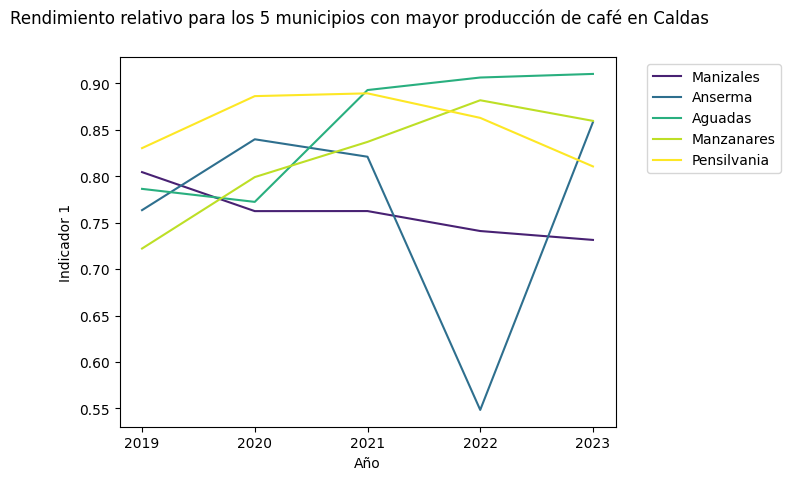

In [ ]:
#Grafico del Indicador 1
fig, ax = plt.subplots()
ax.plot(["2019","2020","2021","2022","2023"], df_pivot_c["Manizales"], color = "#482173", label = "Manizales")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot_c["Anserma"], color = "#2e6f8e", label = "Anserma")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot_c["Aguadas"], color = "#29af7f", label = "Aguadas")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot_c["Manzanares"], color = "#bddf26", label = "Manzanares")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot_c["Pensilvania"], color = "#FDE725", label = "Pensilvania")

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_xlabel('Año')
ax.set_ylabel('Indicador 1')
plt.suptitle("Rendimiento relativo para los 5 municipios con mayor producción de café en Caldas")

Text(0.5, 0.98, 'Rendimiento potencial para los 5 municipios con mayor producción de café en Caldas')

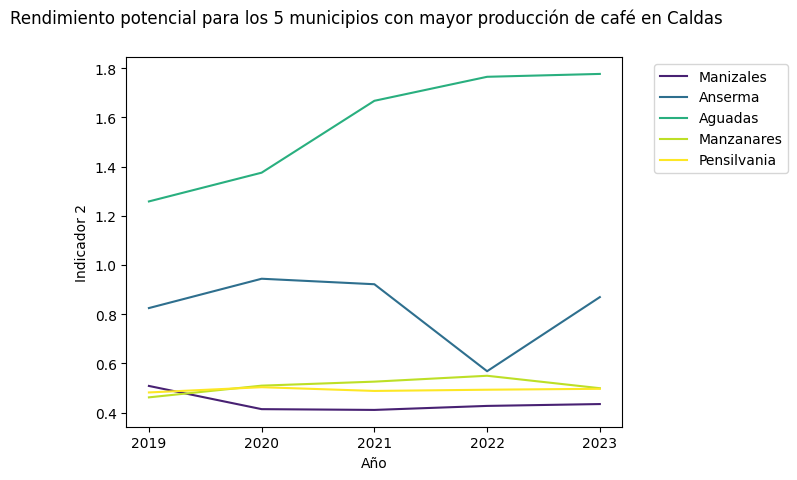

In [ ]:
#dataframe para indicador 2
df_pivot2_c = ind1_c.pivot(index='Año', columns='Municipio', values='Indicador2')
#Grafico del Indicador 2
fig, ax = plt.subplots()
ax.plot(["2019","2020","2021","2022","2023"], df_pivot2_c["Manizales"], color = "#482173", label = "Manizales")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot2_c["Anserma"], color = "#2e6f8e", label = "Anserma")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot2_c["Aguadas"], color = "#29af7f", label = "Aguadas")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot2_c["Manzanares"], color = "#bddf26", label = "Manzanares")
ax.plot(["2019","2020","2021","2022","2023"], df_pivot2_c["Pensilvania"], color = "#FDE725", label = "Pensilvania")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_xlabel('Año')
ax.set_ylabel('Indicador 2')
plt.suptitle("Rendimiento potencial para los 5 municipios con mayor producción de café en Caldas")